# Análisis de resultados – Modelos ResNet-18 por dataset (BloodMNIST, RetinaMNIST, BreastMNIST)

En este notebook se visualizan y analizan los resultados de **tres modelos ResNet-18**:

- `blood`  → entrenado solo con BloodMNIST (8 clases).
- `retina` → entrenado solo con RetinaMNIST (5 clases).
- `breast` → entrenado solo con BreastMNIST (2 clases).

Todos los modelos se han entrenado previamente desde **terminal** con:

```bash
python train.py --dataset blood
python train.py --dataset retina
python train.py --dataset breast

In [1]:
# Notebook para cargas y visualizar los resultados del entrenamiento de ResNet-18

from pathlib import Path
import sys
import subprocess
import platform

# Ruta del proyecto
PROJECT_DIR = Path('/home/TFM_Laura_Monne')
RESULTS_DIR = PROJECT_DIR / 'results'
DATA_DIR    = PROJECT_DIR / 'data'

print('Proyecto :', PROJECT_DIR)
print('Resultados:', RESULTS_DIR)
print('Datos     :', DATA_DIR)

assert PROJECT_DIR.exists(), f"No existe {PROJECT_DIR}. Clona el repo desde TERMINAL antes de usar el notebook."
assert RESULTS_DIR.exists(), f"No existe {RESULTS_DIR}. Entrena desde TERMINAL (python train.py) antes de usar el notebook."

def ensure(pkg_import_name, pip_name=None):
    """Importa o instala con pip si falta."""
    try:
        __import__(pkg_import_name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pip_name or pkg_import_name])

# Dependencias mínimas para este notebook
ensure("numpy")
ensure("pandas")
ensure("sklearn", "scikit-learn")

Proyecto : /home/TFM_Laura_Monne
Resultados: /home/TFM_Laura_Monne/results
Datos     : /home/TFM_Laura_Monne/data


In [2]:
# Comprobación del entorno y dependencias:
import torch
print("Python  :", platform.python_version())
print("PyTorch :", torch.__version__)
print("CUDA ok :", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU     :", torch.cuda.get_device_name(0))

Python  : 3.10.16
PyTorch : 2.7.0+cu126
CUDA ok : True
GPU     : Quadro RTX 6000


In [3]:
# Comprobaciones de resultados
sorted([p.name for p in RESULTS_DIR.iterdir()])

['.ipynb_checkpoints',
 'best_model_blood.pth',
 'best_model_breast.pth',
 'best_model_retina.pth',
 'confusion_matrix_blood.png',
 'confusion_matrix_breast.png',
 'confusion_matrix_normalized_blood.png',
 'confusion_matrix_normalized_breast.png',
 'confusion_matrix_normalized_retina.png',
 'confusion_matrix_retina.png',
 'preds_test_blood.npz',
 'preds_test_breast.npz',
 'preds_test_retina.npz',
 'training_history_blood.png',
 'training_history_breast.png',
 'training_history_retina.png',
 'training_results_blood.json',
 'training_results_breast.json',
 'training_results_retina.json']

In [4]:
# Métricas globales (training_results_{dataset}.json)

from pathlib import Path
import json
from pprint import pprint

RESULTS_DIR = PROJECT_DIR / "results"
dataset = "blood"   # "blood", "retina" o "breast"

metrics_json = RESULTS_DIR / f"training_results_{dataset}.json"

with open(metrics_json, "r") as f:
    obj = json.load(f)

print("CONFIG:")
pprint(obj.get("config", {}), sort_dicts=False)

print("\nResultados de Test:")
pprint(obj.get("results", {}), sort_dicts=False)

CONFIG:
{'batch_size': 64,
 'epochs': 120,
 'learning_rate': 0.001,
 'weight_decay': 0.0001,
 'early_stopping_patience': 12,
 'num_workers': 4,
 'use_class_weights': True,
 'grad_clip_norm': 1.0,
 'num_classes': 8,
 'dataset_name': 'blood',
 'best_model_path': 'results/best_model_blood.pth'}

Resultados de Test:
{'test_loss': 0.0596567865555968, 'test_acc': 98.45074539608302}


In [5]:
RESULTS_DIR = PROJECT_DIR / "results"
dataset = "retina"   # "blood", "retina" o "breast"

metrics_json = RESULTS_DIR / f"training_results_{dataset}.json"

with open(metrics_json, "r") as f:
    obj = json.load(f)

print("CONFIG:")
pprint(obj.get("config", {}), sort_dicts=False)

print("\nResultados de Test:")
pprint(obj.get("results", {}), sort_dicts=False)

CONFIG:
{'batch_size': 32,
 'epochs': 200,
 'learning_rate': 0.00012,
 'weight_decay': 0.0002,
 'early_stopping_patience': 12,
 'scheduler_patience': 6,
 'scheduler_factor': 0.4,
 'num_workers': 4,
 'use_class_weights': True,
 'use_focal_loss': True,
 'focal_gamma': 2.0,
 'use_pretrained': True,
 'freeze_backbone': True,
 'use_acc_for_best_model': True,
 'label_smoothing': 0.0,
 'grad_clip_norm': 1.0,
 'num_classes': 5,
 'dataset_name': 'retina',
 'best_model_path': 'results/best_model_retina.pth'}

Resultados de Test:
{'test_loss': 0.33071157049674255, 'test_acc': 60.5}


In [6]:
RESULTS_DIR = PROJECT_DIR / "results"
dataset = "breast"   # "blood", "retina" o "breast"

metrics_json = RESULTS_DIR / f"training_results_{dataset}.json"

with open(metrics_json, "r") as f:
    obj = json.load(f)

print("CONFIG:")
pprint(obj.get("config", {}), sort_dicts=False)

print("\nResultados de Test:")
pprint(obj.get("results", {}), sort_dicts=False)

CONFIG:
{'batch_size': 32,
 'epochs': 200,
 'learning_rate': 0.0005,
 'weight_decay': 0.0002,
 'early_stopping_patience': 15,
 'scheduler_patience': 5,
 'scheduler_factor': 0.5,
 'num_workers': 4,
 'use_class_weights': True,
 'use_focal_loss': True,
 'focal_gamma': 2.0,
 'use_pretrained': True,
 'freeze_backbone': True,
 'use_acc_for_best_model': False,
 'label_smoothing': 0.0,
 'grad_clip_norm': 1.0,
 'num_classes': 2,
 'dataset_name': 'breast',
 'best_model_path': 'results/best_model_breast.pth'}

Resultados de Test:
{'test_loss': 0.09230505004525184, 'test_acc': 90.38461538461539}


In [7]:
"""
Tabla resumen con métricas globales por modelo
(leyendo training_results_<dataset>.json)
"""

from pathlib import Path
import json
import pandas as pd
from IPython.display import display

RESULTS_DIR = PROJECT_DIR / "results"
DATASETS = ["blood", "retina", "breast"]

rows = []

for ds in DATASETS:
    json_path = RESULTS_DIR / f"training_results_{ds}.json"

    if not json_path.exists():
        print(f"No encontrado: {json_path}")
        continue

    with open(json_path, "r") as f:
        obj = json.load(f)

    cfg = obj.get("config", {})
    res = obj.get("results", {})

    row = {
        "Dataset": ds.upper(),
        # accuracy ya está en porcentaje en tu train.py
        "Test acc (%)":  res.get("test_acc", float("nan")),
        "Test loss":     res.get("test_loss", float("nan")),
        "Epochs usadas": cfg.get("epochs_used", cfg.get("epochs", None)),
        "Batch size":    cfg.get("batch_size", None),
        "Learning rate": cfg.get("learning_rate", None),
    }

    rows.append(row)

df_summary = pd.DataFrame(rows).round(4)

print("Resumen global de métricas por modelo")
display(df_summary)

Resumen global de métricas por modelo


,Dataset,Test acc (%),Test loss,Epochs usadas,Batch size,Learning rate
0,BLOOD,98.4507,0.0597,120,64,0.0010
1,RETINA,60.5000,0.3307,200,32,0.0001
2,BREAST,90.3846,0.0923,200,32,0.0005



====================== BLOOD ======================
Curva de entrenamiento: training_history_blood.png


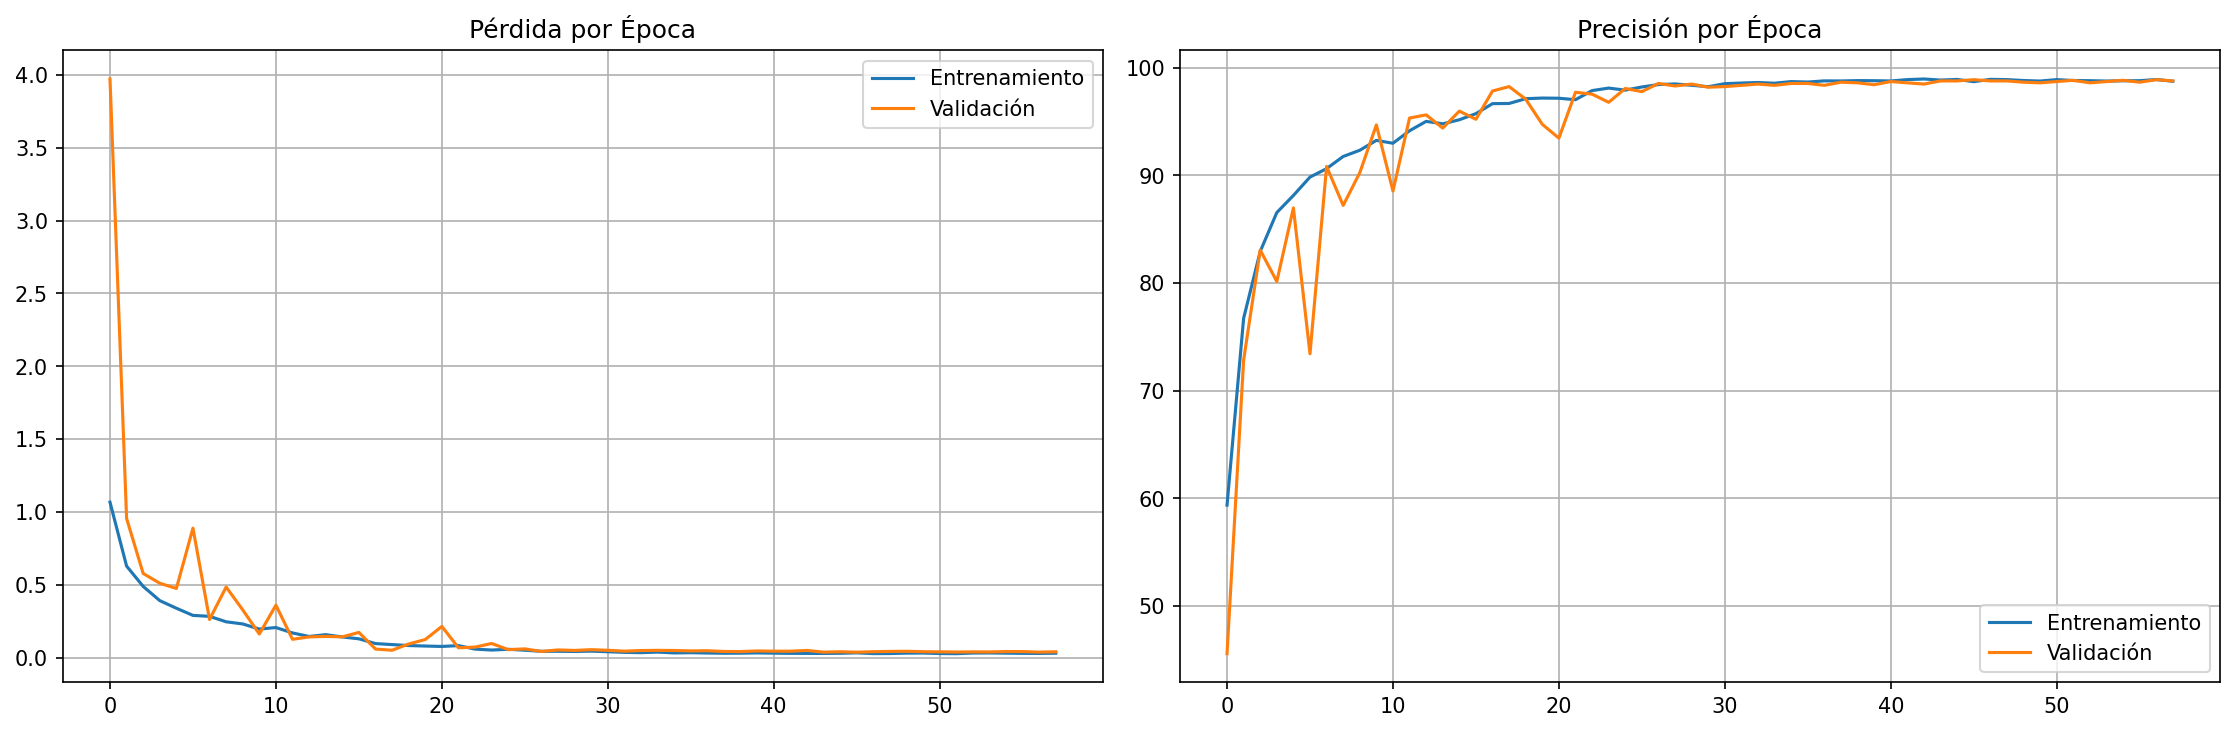


Matriz de confusión: confusion_matrix_normalized_blood.png


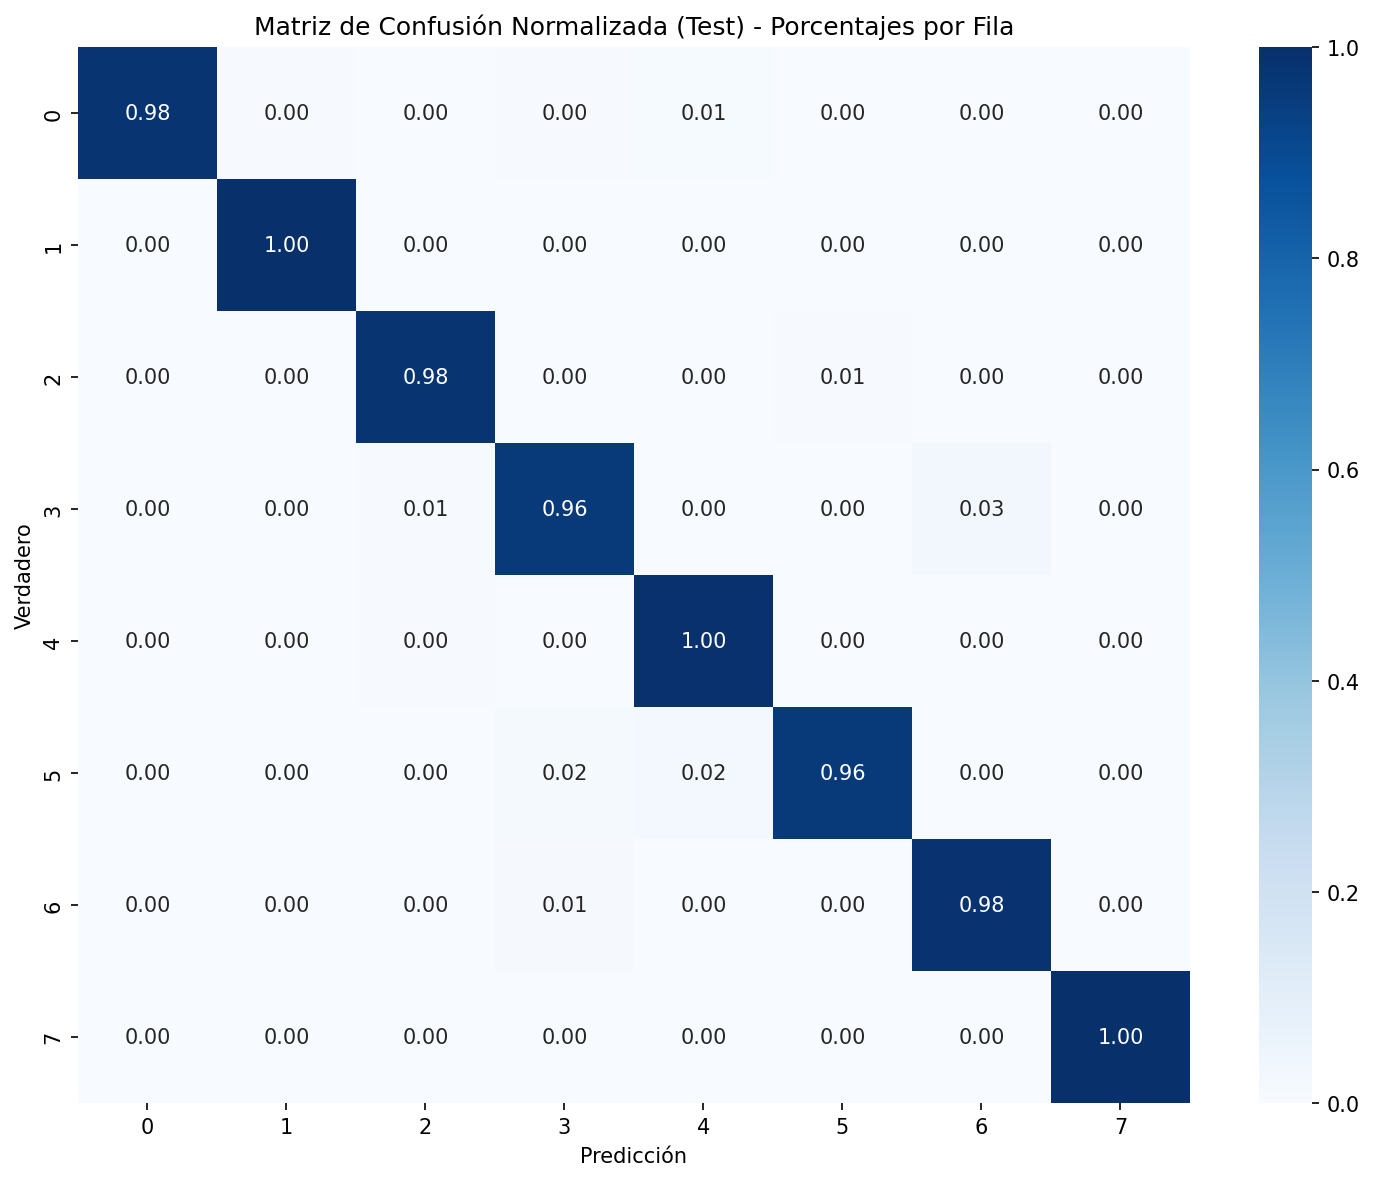


====================== RETINA ======================
Curva de entrenamiento: training_history_retina.png


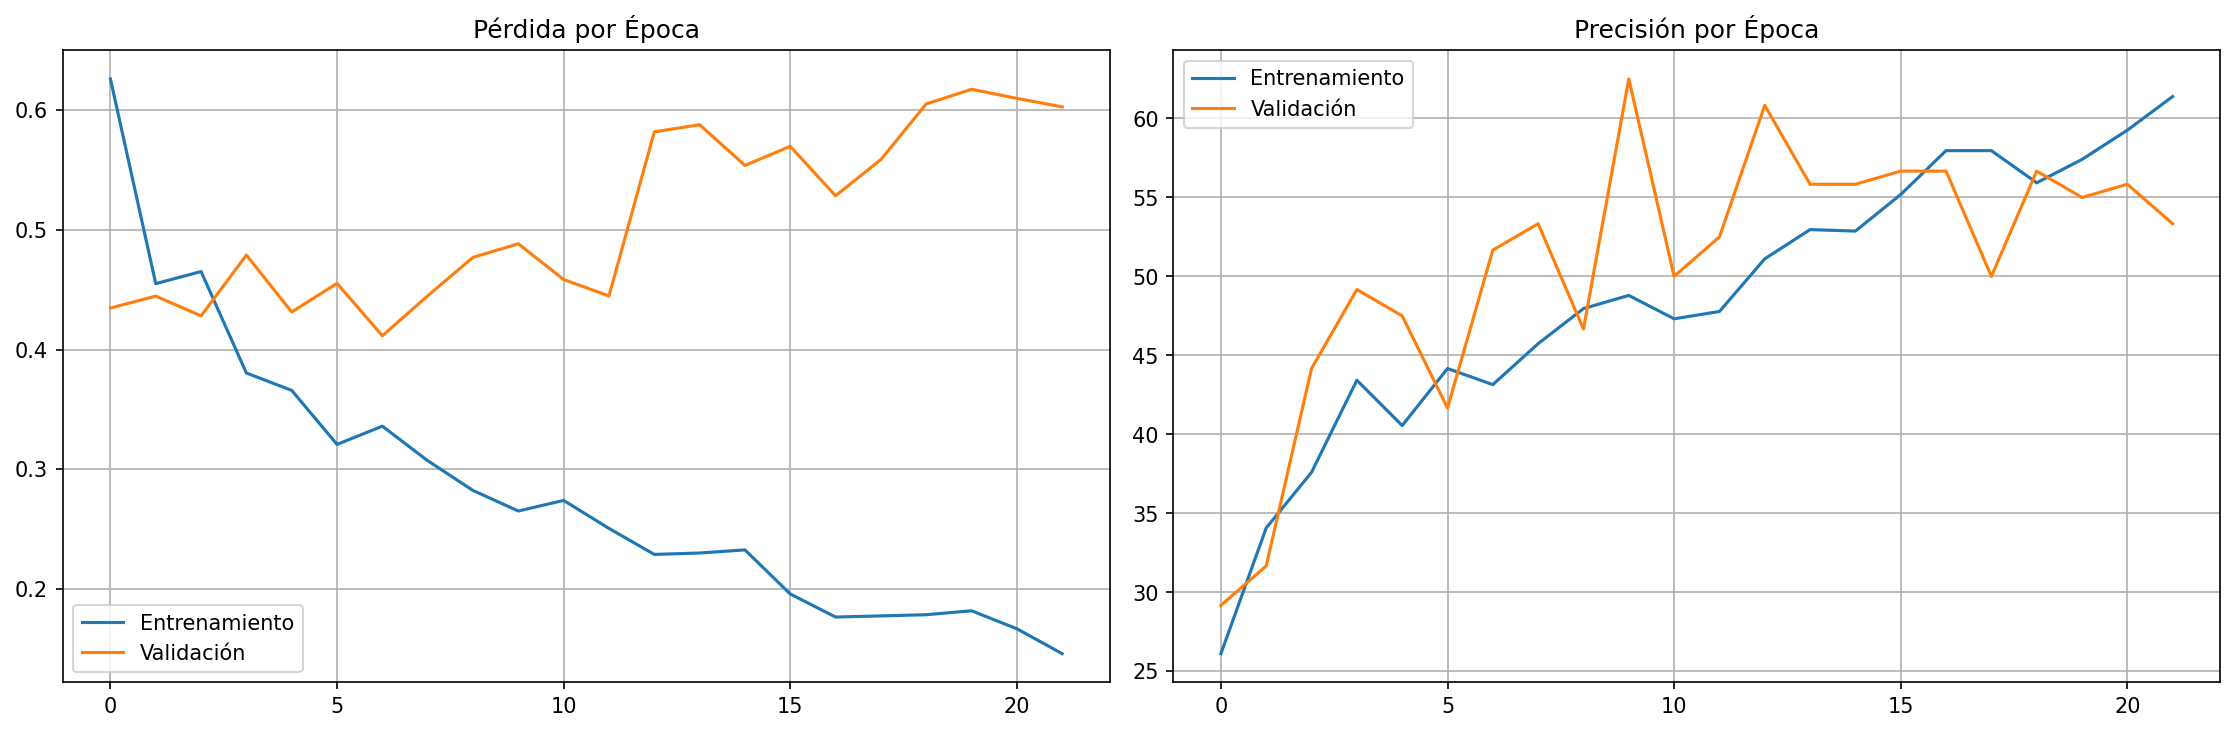


Matriz de confusión: confusion_matrix_normalized_retina.png


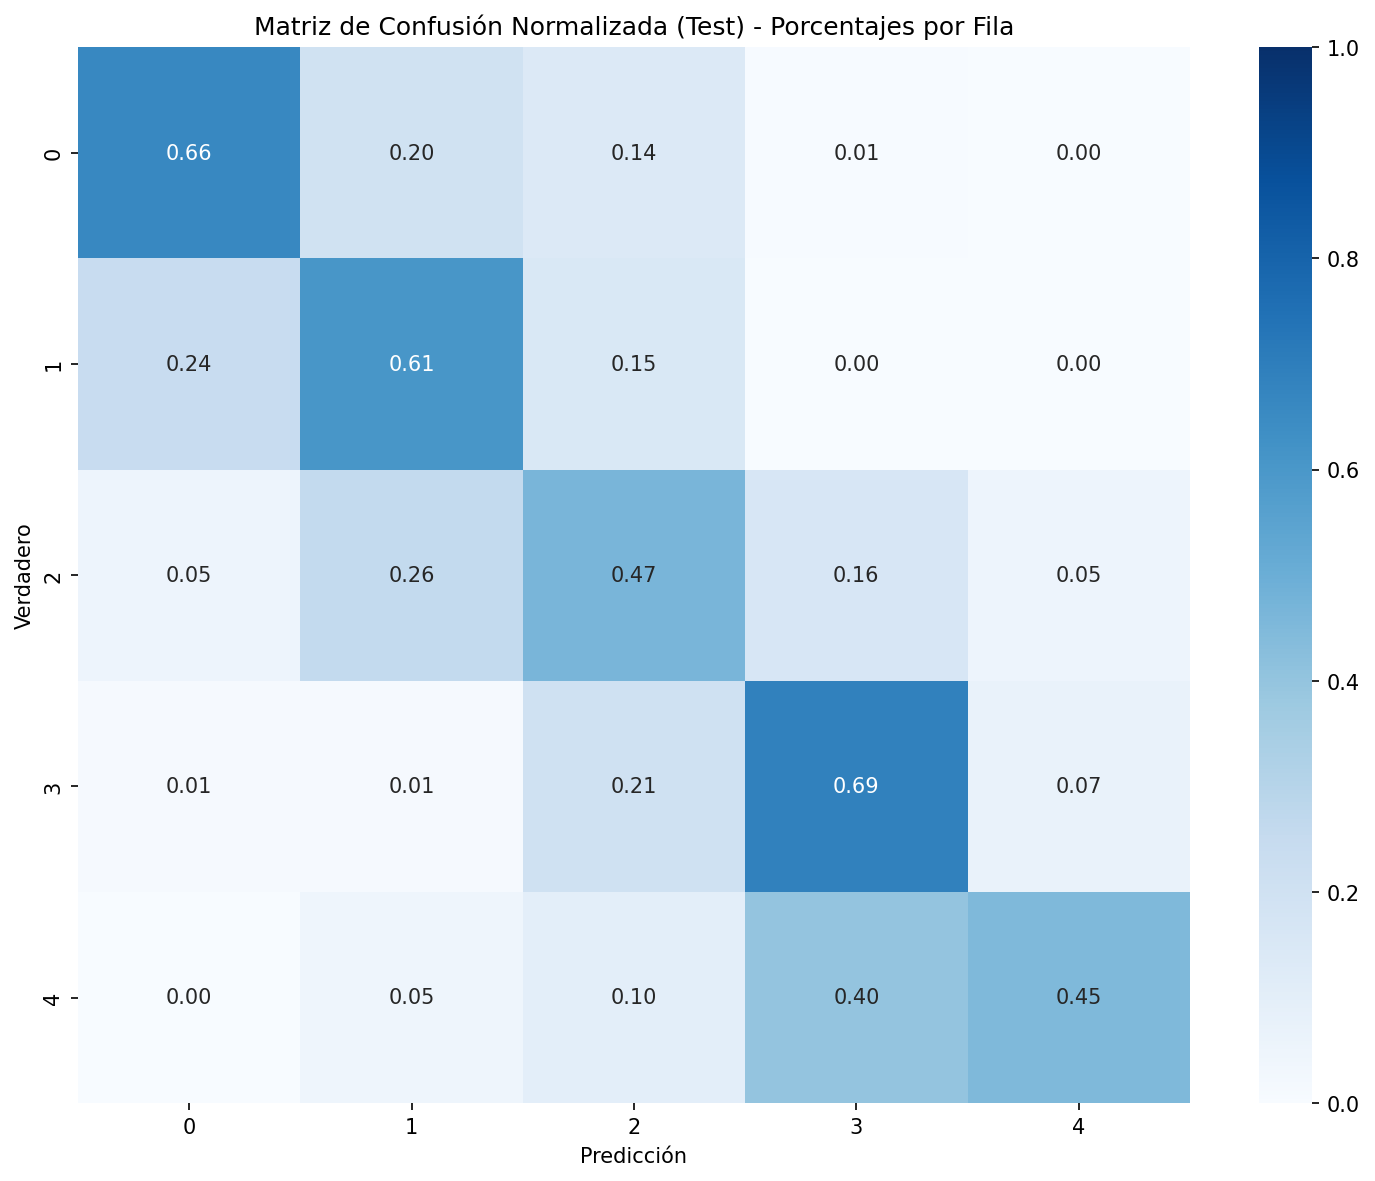


====================== BREAST ======================
Curva de entrenamiento: training_history_breast.png


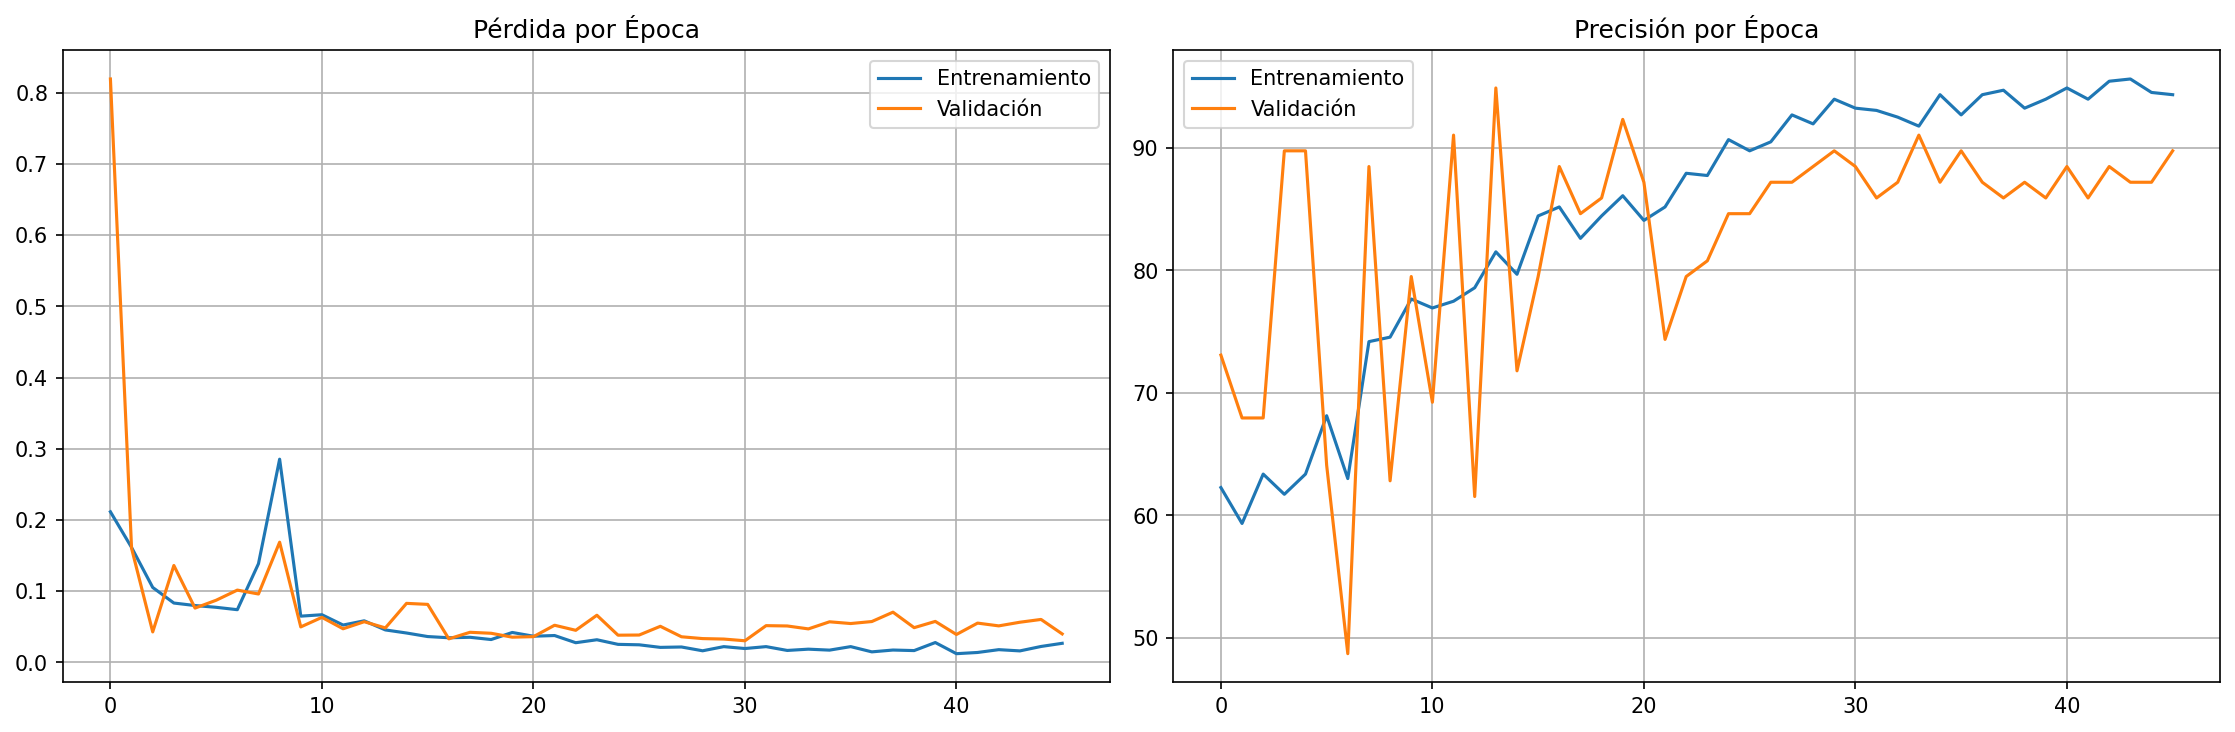


Matriz de confusión: confusion_matrix_normalized_breast.png


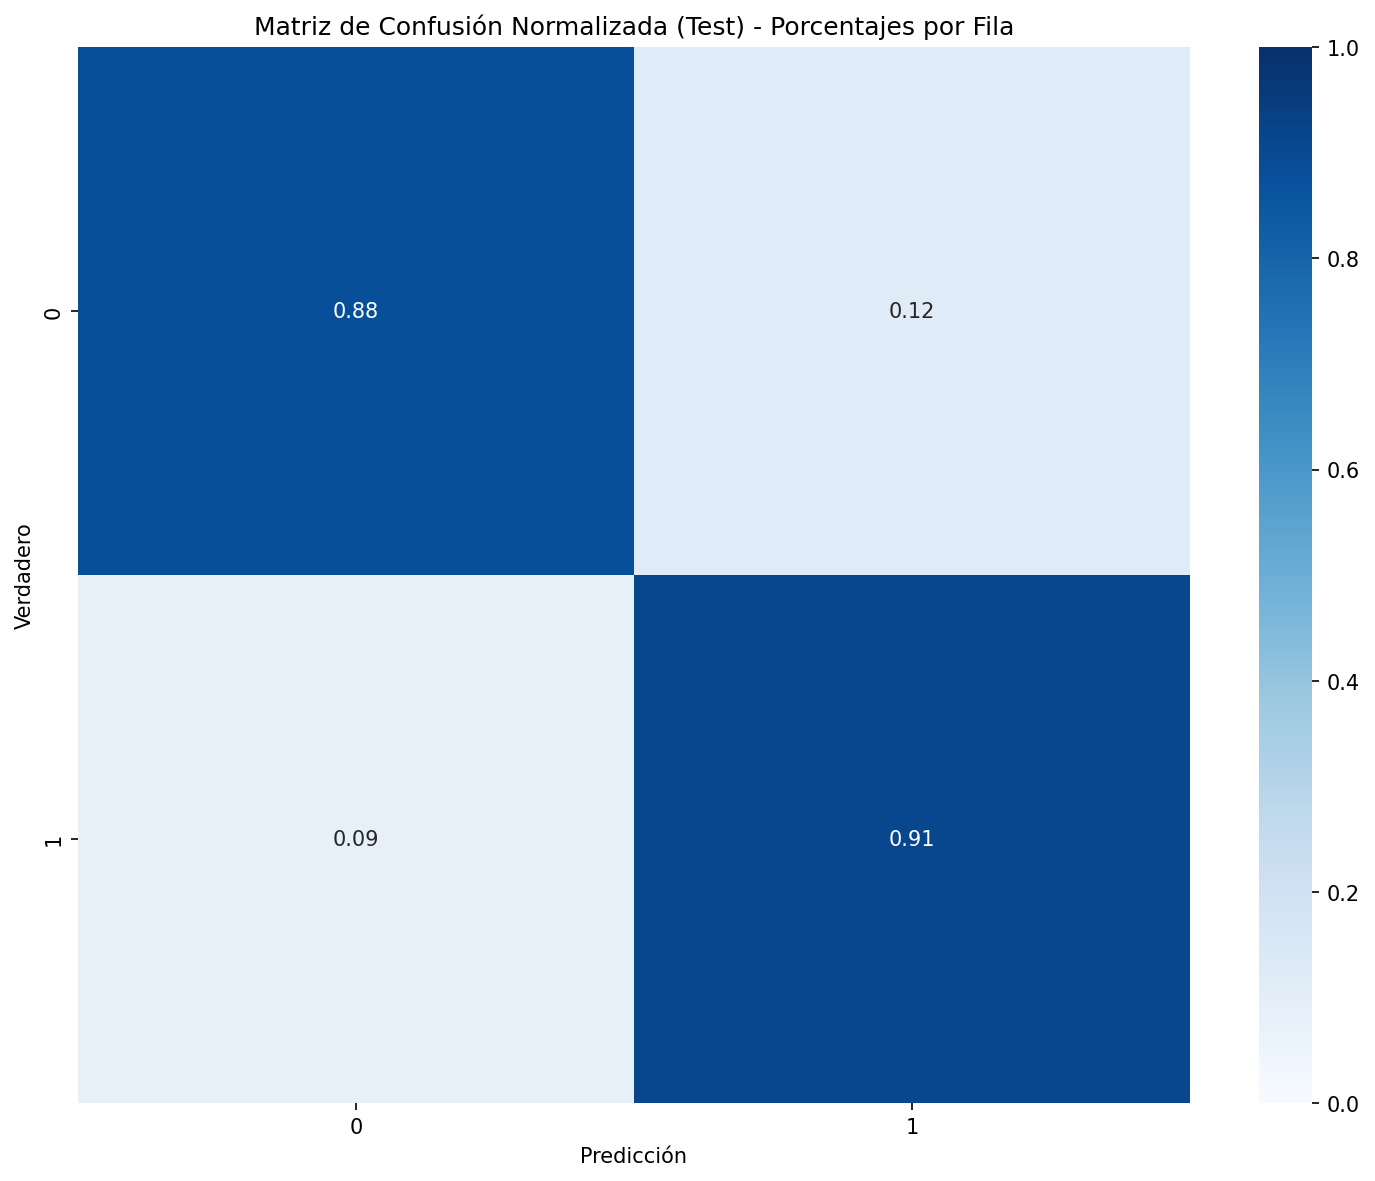

In [10]:
"""
Esta celda muestra, para cada modelo (blood, retina, breast),
la curva de entrenamiento/validación y su matriz de confusión normalizada.
"""

from pathlib import Path
from IPython.display import display, Image

RESULTS_DIR = PROJECT_DIR / "results"
DATASETS = ["blood", "retina", "breast"]

for ds in DATASETS:
    print(f"\n====================== {ds.upper()} ======================")

    hist_path = RESULTS_DIR / f"training_history_{ds}.png"
    cm_path   = RESULTS_DIR / f"confusion_matrix_normalized_{ds}.png"

    print("Curva de entrenamiento:", hist_path.name)
    if hist_path.exists():
        display(Image(filename=str(hist_path)))

    print("\nMatriz de confusión:", cm_path.name)
    if cm_path.exists():
        display(Image(filename=str(cm_path)))

In [12]:
"""
En esta celda cargamos las predicciones de test para cada modelo
(`preds_test_<dataset>.npz`) y calculamos:

- classification_report (precision, recall, F1, soporte)
- una tabla con métricas por clase
"""

from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, precision_recall_fscore_support
from IPython.display import display

RESULTS_DIR = Path("results")
DATASETS = ["blood", "retina", "breast"]

for ds in DATASETS:
    print(f"\n====================== {ds.upper()} ======================")

    npz_path = RESULTS_DIR / f"preds_test_{ds}.npz"

    if not npz_path.exists():
        print("⚠️ No se encontró el archivo de predicciones:", npz_path)
        continue

    data = np.load(npz_path)
    y_true, y_pred = data["y_true"], data["y_pred"]

    # Nombres de clase: 0..(num_classes-1) del modelo de ese dataset
    labels = sorted(set(y_true.tolist()))
    target_names = [str(i) for i in labels]

    print("\n=== Classification Report ===")
    print(classification_report(y_true, y_pred, labels=labels, target_names=target_names, digits=4, zero_division=0))

    prec, rec, f1, support = precision_recall_fscore_support(
        y_true, y_pred, labels=labels, zero_division=0
    )

    df = pd.DataFrame({
        "Dataset": ds.upper(),
        "Clase": labels,
        "Precisión": prec,
        "Recall": rec,
        "F1-score": f1,
        "Soporte": support
    }).round(4)

    display(df)


====================== BLOOD ======================

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9917    0.9836    0.9877       244
           1     0.9968    1.0000    0.9984       624
           2     0.9808    0.9839    0.9823       311
           3     0.9738    0.9620    0.9679       579
           4     0.9680    0.9959    0.9817       243
           5     0.9891    0.9613    0.9750       284
           6     0.9762    0.9850    0.9806       666
           7     0.9979    1.0000    0.9989       470

    accuracy                         0.9845      3421
   macro avg     0.9843    0.9840    0.9841      3421
weighted avg     0.9845    0.9845    0.9845      3421



,Dataset,Clase,Precisión,Recall,F1-score,Soporte
0,BLOOD,0,0.9917,0.9836,0.9877,244
1,BLOOD,1,0.9968,1.0000,0.9984,624
2,BLOOD,2,0.9808,0.9839,0.9823,311
3,BLOOD,3,0.9738,0.9620,0.9679,579
4,BLOOD,4,0.9680,0.9959,0.9817,243
5,BLOOD,5,0.9891,0.9613,0.9750,284
6,BLOOD,6,0.9762,0.9850,0.9806,666
7,BLOOD,7,0.9979,1.0000,0.9989,470



====================== RETINA ======================

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.8712    0.6609    0.7516       174
           1     0.3182    0.6087    0.4179        46
           2     0.4778    0.4674    0.4725        92
           3     0.6620    0.6912    0.6763        68
           4     0.4737    0.4500    0.4615        20

    accuracy                         0.6050       400
   macro avg     0.5606    0.5756    0.5560       400
weighted avg     0.6617    0.6050    0.6217       400



,Dataset,Clase,Precisión,Recall,F1-score,Soporte
0,RETINA,0,0.8712,0.6609,0.7516,174
1,RETINA,1,0.3182,0.6087,0.4179,46
2,RETINA,2,0.4778,0.4674,0.4725,92
3,RETINA,3,0.6620,0.6912,0.6763,68
4,RETINA,4,0.4737,0.4500,0.4615,20



====================== BREAST ======================

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.7872    0.8810    0.8315        42
           1     0.9541    0.9123    0.9327       114

    accuracy                         0.9038       156
   macro avg     0.8707    0.8966    0.8821       156
weighted avg     0.9092    0.9038    0.9055       156



,Dataset,Clase,Precisión,Recall,F1-score,Soporte
0,BREAST,0,0.7872,0.8810,0.8315,42
1,BREAST,1,0.9541,0.9123,0.9327,114
